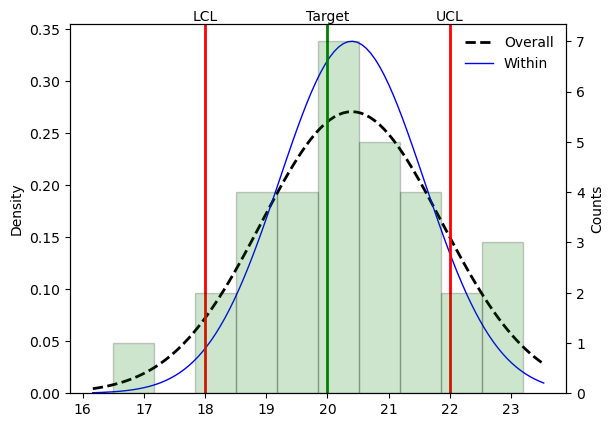

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as stat

# Generate or load your data
group = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8]

data = [18.5, 21.2, 19.4, 16.5, 17.9, 19.0, 20.3, 21.2, 19.6, 19.8, 20.4, 20.5, 
          22.2, 21.5, 20.8, 20.3, 19.1, 20.6, 20.8, 21.6, 22.8, 22.2, 23.2, 23.0, 
          19.0, 20.5, 20.3, 19.2, 20.7, 21.0, 20.5, 19.1]


fig,ax1=plt.subplots()
# Add y axis on the right side
ax2=ax1.twinx()

# Create histogram
# Use density=True when creating the histogram to ensure 
# the y-axis represents probability density, which is 
# necessary for a proper comparison with the normal distribution curve
ax2.hist(data, density=False, alpha=0.2, color='g', edgecolor='k')
ax1.hist(data, density=True, alpha=0, color='b')

# Fit a normal distribution to the data
# mu, std = norm.fit(data)
# norm.fit treat the data as population, which is Not for CPK

std = stat.stdev(data)
mean = stat.mean(data)
std_within= std*.8
target=20
ucl=22
lcl=18
xlabel=None

# Create x and y values for the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Plot the normal distribution curve for overall
y = norm.pdf(x, mean, std)
ax1.plot(x, y, 'k', linewidth=2,linestyle="dashed",label="Overall")

# Plot the normal distribution curve for overall
y = norm.pdf(x, mean, std_within)
ax1.plot(x, y, 'b', linewidth=1,label="Within")

# Add labels and title
ax2.set_ylabel("Counts")
ax1.set_xlabel(xlabel)
ax1.set_ylabel('Density')
# ax1.set_title(f'Histogram with Normal Distribution Fit (μ={mu:.2f}, σ={std:.2f})')

ax1.axvline(target,color='g',linewidth=2)
ax1.axvline(ucl,color='r',linewidth=2)
ax1.axvline(lcl,color='r',linewidth=2)
txt_pos=max(ax1.get_ylim())
ax1.text(target, txt_pos, "Target",horizontalalignment='center', verticalalignment='bottom')
ax1.text(ucl, txt_pos, "UCL",horizontalalignment='center', verticalalignment='bottom')
ax1.text(lcl, txt_pos, "LCL",horizontalalignment='center', verticalalignment='bottom')
ax1.legend(loc='best', frameon=False)

plt.show()


In [57]:
d2_values = [np.nan,np.nan,
    1.128379167,  # n = 2
    1.692568751,  # n = 3
    2.058751154,  # n = 4
    2.325929342,  # n = 5
    2.534413951,  # n = 6
    2.704000246,  # n = 7
    2.847000307,  # n = 8
    2.970000000,  # n = 9
    3.077999711,  # n = 10
    3.173000000,  # n = 11
    3.258000000,  # n = 12
    3.336000000,  # n = 13
    3.407000000,  # n = 14
    3.472000000,  # n = 15
    3.532000000,  # n = 16
    3.588000000,  # n = 17
    3.640000000,  # n = 18
    3.689000000,  # n = 19
    3.735000000   # n = 20
]

d2=data[1:]+[0]
print(data,d2)
d3=[abs(i-j) for i,j in zip(data, d2)]
stat.mean(d3[:-1])/d2_values[2] 

# this is same to the JMP individual sample size is 1


[18.5, 21.2, 19.4, 16.5, 17.9, 19.0, 20.3, 21.2, 19.6, 19.8, 20.4, 20.5, 22.2, 21.5, 20.8, 20.3, 19.1, 20.6, 20.8, 21.6, 22.8, 22.2, 23.2, 23.0, 19.0, 20.5, 20.3, 19.2, 20.7, 21.0, 20.5, 19.1] [21.2, 19.4, 16.5, 17.9, 19.0, 20.3, 21.2, 19.6, 19.8, 20.4, 20.5, 22.2, 21.5, 20.8, 20.3, 19.1, 20.6, 20.8, 21.6, 22.8, 22.2, 23.2, 23.0, 19.0, 20.5, 20.3, 19.2, 20.7, 21.0, 20.5, 19.1, 0]


1.0120139730220377

In [65]:
def grouping_by_labels(data_list,grouping_list):
    data=[(i,j) for i,j in zip(grouping_list,data_list)]
    data.sort(key=lambda x:x[0])
    subgroup, res=[],[]
    prev_i=None
    for i,j in data:
        if prev_i != i:
            res.append(subgroup)
            subgroup=[]
        subgroup.append(j)
        prev_i = i
    res.append(subgroup)
    return res[1:]


In [95]:
d=grouping_by_labels(data[:-1],group[:-1])
# grouping_by_labels([1,2,3,4],["a","a","b","c"])

dd=grouping_by_labels(data,group)
stat.mean([max(l)-min(l) for l in dd])/d2_values[len(dd[0])] 

# this is same to JMP average range method of consistent subgroup size


1.0746806362203014

In [100]:
# https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation
# to get unbiased std use normal std (mean.stdev) divided by c4 below
# n is the number of sample points. 

from scipy.special import gamma

def c4_values(n):
    return (2/(n-1))**.5*gamma(n/2)/gamma((n-1)/2)
    

In [112]:
std=stat.mean([stat.stdev(l)/c4_values(len(l)) for l in dd])
cpk=.508
n=32
# this is same to JMP average range method of consistent subgroup size

from scipy.stats import chi2, zscore

# Cpk - (Cpk / sqrt(2*(n-1))) * 
# (chi-square(0.95, 2*(n-1)) / (2*(n-1)) - 1)
# Lower CI = Ĉpk - z(0.975) * √((1 + (Ĉpk)^2) / (9n))
# Upper CI = Ĉpk + z(0.975) * √((1 + (Ĉpk)^2) / (9n))
# cpk-(cpk/(2*(32-1))**.5/(2*(32-1)-1)) * chi2.ppf(.95,2*31)

cpk*(1 - norm.ppf(.975) * ( 1/(9*n*cpk*cpk) + 1/2/(n-1) )**.5)

0.3367464176288292

In [98]:
stat.mean([stat.stdev(l)/c4_values(len(l)) for l in d])

# this is same to JMP average range method of INconsistent subgroup size

0.9729944425511934

In [99]:
stat.mean([(max(l)-min(l))/d2_values[len(l)] for l in d])

# this is same to JMP average range method of INconsistent subgroup size


0.9962455598680462